In [17]:
import pandas as pd

# 1. 경기도 시군 인구밀도
df_density = pd.read_csv("data/경기도_시군_인구밀도_2023.csv", index_col=0)
df_density.index.name = '지역'
df_density.index = df_density.index.str.strip()
mask = df_density.index.str.endswith('구') | df_density.index.str.contains('전체|합계|경기도')
df_density = df_density[~mask]

# 2. 범죄발생건수
df_crime = pd.read_csv("data/경기도_시군별_범죄발생건수.csv", index_col=0)
df_crime.index.name = '지역'
df_crime.index = df_crime.index.str.strip()

# 3. 소아과 병원 수
df_hospital = pd.read_excel("data/소아과 병원.xlsx", index_col=0)
df_hospital.index.name = '지역'
df_hospital.index = df_hospital.index.str.strip()

# 4. 유치원 수
df_kindergarten = pd.read_csv("data/시_유치원수_경기도.csv", index_col=0)
df_kindergarten.index.name = '지역'
df_kindergarten.index = df_kindergarten.index.str.strip()

# 5. 출생아수 및 합계출산율
df_birth = pd.read_excel(
    "data/시군구_출생아수__합계출산율_20250517164618.xlsx",
    index_col=0
)
df_birth.index.name = '지역'
df_birth.index = df_birth.index.str.strip()
mask = df_birth.index.str.endswith(('시', '군'))
df_birth = df_birth.loc[mask]
birth_col = df_birth.columns[0]     # 보통 '2023' 이겠지만, df_birth.columns[0] 로 일반화
df_birth = df_birth[[birth_col]]
df_birth.columns = ['BirthCount']

# 6. 초등돌봄교실 수
df_care = pd.read_csv("data/초등돌봄교실.csv", index_col=0)
df_care.index.name = '지역'
df_care.index = df_care.index.str.strip()

# 7. 초등학교 수
df_elementary = pd.read_csv("data/초등학교수.csv", index_col=0)
df_elementary.index.name = '지역'
df_elementary.index = df_elementary.index.str.strip()

# 8. 출산장려금
df_subsidy = pd.read_excel("data/출산장려금.xlsx", index_col=0)
df_subsidy.index.name = '지역'
df_subsidy.index = df_subsidy.index.str.strip()

# 9. 병합
df_final = pd.concat([
    df_density,
    df_crime,
    df_hospital,
    df_kindergarten,
    df_birth,
    df_care,
    df_elementary,
    df_subsidy
], axis=1)

# 10. 컬럼명 영어로 변경
df_final.rename(columns={'합계출산율': 'BirthRate'}, inplace=True)

df_final


c:\Users\sion3\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,인구밀도(명/km²),범죄발생건수,병원 수,유치원 수,BirthCount,돌봄교실 수,초등학교 수,지원금
지역,,,,,,,,
수원시,10185.227085,64,91,178,5940,98,101,0
용인시,1851.422530,53,72,159,4941,105,107,300
화성시,1415.035745,87,67,179,6714,107,107,1000
성남시,6609.929379,22,82,117,4372,73,72,300
부천시,15043.955224,38,47,120,3339,64,62,0
안산시,4354.817891,85,38,84,2986,55,53,1000
평택시,1352.485272,43,37,114,3628,67,72,500
안양시,9420.717949,33,35,74,3093,41,41,2000
시흥시,4029.688857,64,41,80,2863,49,50,0


### Model Weights By Feature ###
                       LinearRegression       Ridge       Lasso  RandomForest  GradientBoosting
KindergartenCount           1975.429867  559.215221  985.323464      0.237193          0.178924
HospitalCount                838.884390  632.454097  706.411905      0.244503          0.228882
ElementarySchoolCount        779.273816  279.423289    0.000000      0.228528          0.204997
CrimeIncidents               269.432879  226.103670  215.367147      0.017198          0.016574
SubsidyAmount                181.951757  132.770501  137.212418      0.002573          0.000562
CareClassCount             -1893.119396  178.980533   -0.000000      0.260286          0.363542
PopulationDensity            -94.658382   79.358000    3.823713      0.009718          0.006519

### Model Performance (R² Score) ###
LinearRegression: 0.825
Ridge: 0.803
Lasso: 0.841
RandomForest: 0.840
GradientBoosting: 0.926

### Average Normalized Importance ###
KindergartenCount        0.2

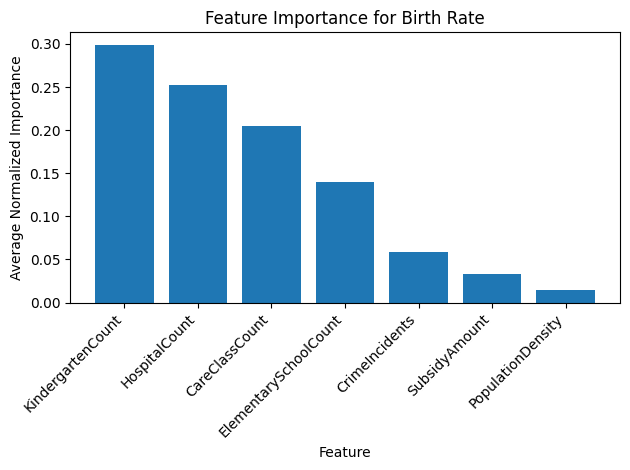

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. 데이터 로드 및 컬럼명 매핑
df = pd.read_csv("df_final_updated.csv")
column_mapping = {
    '2023_출산율': 'BirthRate',
    '유치원 수': 'KindergartenCount',
    '병원 수': 'HospitalCount',
    '초등학교 수': 'ElementarySchoolCount',
    '돌봄교실 수': 'CareClassCount',
    '인구밀도(명/km²)': 'PopulationDensity',
    '범죄발생건수': 'CrimeIncidents',
    '지원금': 'SubsidyAmount'
}
df = df.rename(columns=column_mapping)

# 2. 피처 및 타깃 설정
numeric_cols = df.select_dtypes(include=[np.number]).columns
features = numeric_cols.drop('BirthRate')
X = df[features]
y = df['BirthRate']

# 3. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 스케일링 (선형 모델용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 모델 정의
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=10.0),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

# 6. 가중치 및 성능 저장
weights = pd.DataFrame(index=features)
performance = {}

for name, model in models.items():
    if name in ['LinearRegression', 'Ridge', 'Lasso']:
        model.fit(X_train_scaled, y_train)
        coef = model.coef_
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        coef = model.feature_importances_
        preds = model.predict(X_test)
    
    weights[name] = coef
    performance[name] = r2_score(y_test, preds)

# 7. 결과 출력: 가중치 매트릭스
print("### Model Weights By Feature ###")
print(weights.to_string())

# 8. 결과 출력: 모델 성능
print("\n### Model Performance (R² Score) ###")
for name, score in performance.items():
    print(f"{name}: {score:.3f}")

# 9. 평균 정규화 중요도 계산 및 시각화
importances_abs = weights.abs()
importances_norm = importances_abs.div(importances_abs.sum(axis=0), axis=1)
importances_norm['Average'] = importances_norm.mean(axis=1)
importances_norm = importances_norm.sort_values('Average', ascending=False)

print("\n### Average Normalized Importance ###")
print(importances_norm['Average'].to_string())

plt.figure()
plt.bar(importances_norm.index, importances_norm['Average'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Average Normalized Importance')
plt.title('Feature Importance for Birth Rate')
plt.tight_layout()
plt.show()
